In [53]:
#Minimaks algoritam od video na Sebastian

function minimax(position, depth, alpha, beta, maximizingPlayer):
    if depth == 0 or game over in position
        return static evaluation of position


        
    if maximizingPlayer
        maxEval = -infinity
        for each of child of position
            eval = minimax(child, alpha depth - 1, false)
            maxEval = max(maxEval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha
                break
        return maxEval
    else 
        minEval = +infinity
        for each child of position
            eval = minimax(child, alpha, betadepth - 1, true)
            miniEval = min(minEval, eval)
            beta = min(beta, eval)
            if beta <= alpha
                break
        return minEval


SyntaxError: invalid syntax (2494964786.py, line 3)

In [54]:
class Graph():
    
    def __init__(self):
        self.dict = {}
    
    def add_vertex(self, vertex):
        self.dict[vertex] = []
        
    def add_edge(self, edge, add_reversed=True):
        node1, node2 = edge
        self.dict[node1].append(node2)
        if add_reversed:
            self.dict[node2].append(node1)
        
    def give_nodes(self):
        return list(self.dict)
    
    def give_edges(self):
        links = []
        for node1 in self.dict:
            for node2 in self.dict[node1]:
                links.append((node1, node2))
        return links
    
    def give_neighbors(self, node):
        return list(self.dict[node])

In [55]:
g = Graph()
for vertex in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
               'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V']:
    g.add_vertex(vertex)
for edge in [('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'E'), ('B', 'F'), ('C', 'G'), 
             ('C', 'H'), ('D', 'I'), ('D', 'J'), ('E', 'K'), ('E', 'L'),
             ('F', 'M'), ('F', 'N'), ('G', 'O'), ('G', 'P'), ('H', 'Q'), ('H', 'R'),
             ('I', 'S'), ('I', 'T'), ('J', 'U'), ('J', 'V')]:
    g.add_edge(edge, add_reversed=False)
leafs = {'K': 4, 'L': 6, 'M': 7, 'N': 9, 'O': 1, 'P': 2, 'Q': 0, 'R': 1, 'S': 8, 'T': 1, 'U': 9, 'V': 2}

In [56]:
def other_player(player):
    if player == "MAX":
        return 'MIN'
    else:
        return 'MAX'

In [57]:
def minimax(graph, node, player):
    # player - player on turn
    if node in leafs:
        print(node, end=' ')
        return leafs[node]
        # OVAA E ISTO KAKO EVALUATE THE POSITION AKO DEPTH  == 0

    if player == 'MIN':
        best = float('inf')
    else:
        best = float('-inf')

    for child in graph.give_neighbors(node):
        result = minimax(graph, child, other_player(player))


        if player == "MIN" and result < best:
            best = result

        elif player == "MAX" and result > best:
            best = result
            
    return best

In [58]:
minimax(g, 'B', 'MAX')

K L M N 

7

In [59]:
def minimax_alpha_beta(graph, node, player, alpha=float('-inf'), beta=float('inf')):
    if node in leafs:
        print(node, end=' ')
        return leafs[node]

    if player == "MAX":
        best = float('-inf')
        for child in graph.give_neighbors(node):
            val = minimax_alpha_beta(graph, child, "MIN", alpha, beta)
            best = max(best, val)
            alpha = max(alpha, best)
            if alpha >= beta:   # prune
                break
        return best

    else:  # player == "MIN"
        best = float('inf')
        for child in graph.give_neighbors(node):
            val = minimax_alpha_beta(graph, child, "MAX", alpha, beta)
            best = min(best, val)
            beta = min(beta, best)
            if alpha >= beta:   # prune
                break
        return best


In [60]:
game_result = minimax_alpha_beta(g, 'A', 'MAX')
game_result

K L M O P S T U 

8

In [61]:
# MINI MAX IGRANJE BEZ KORISTENJE NA REKURZIJA

In [62]:
from math import inf

HUMAN = "X"
AI = "O"
EMPTY = " "

WIN_LINES = [
    (0,1,2),(3,4,5),(6,7,8),
    (0,3,6),(1,4,7),(2,5,8),
    (0,4,8),(2,4,6)
]

def winner(b):
    for a, c, d in WIN_LINES:
        if b[a] != EMPTY and b[a] == b[c] == b[d]:
            return b[a]
    return None

def is_terminal(b):
    return winner(b) is not None or EMPTY not in b

def evaluate_terminal(b, depth_left):
    w = winner(b)
    if w == AI:
        return 10 + depth_left
    if w == HUMAN:
        return -10 - depth_left
    return 0

def available_moves(b):
    return [i for i in range(9) if b[i] == EMPTY]

def make_move(b, idx, player):
    nb = b[:]
    nb[idx] = player
    return nb


In [63]:
def minimax_alpha_beta_iterative(board, max_depth):
    """
    Returns (best_score, best_move) for AI
    NO recursion used.
    """
    # Stack entries = node states
    stack = []

    root = {
        "board": board,
        "depth": max_depth,
        "maximizing": True,
        "alpha": -inf,
        "beta": inf,
        "moves": available_moves(board),
        "move_index": 0,
        "best_score": -inf,
        "best_move": None,
        "parent": None,
        "move_from_parent": None
    }

    stack.append(root)

    while stack:
        node = stack[-1]

        # Terminal or depth limit
        if node["depth"] == 0 or is_terminal(node["board"]):
            score = evaluate_terminal(node["board"], node["depth"])
            stack.pop()

            if node["parent"] is not None:
                parent = node["parent"]

                if parent["maximizing"]:
                    if score > parent["best_score"]:
                        parent["best_score"] = score
                        parent["best_move"] = node["move_from_parent"]
                    parent["alpha"] = max(parent["alpha"], parent["best_score"])
                else:
                    if score < parent["best_score"]:
                        parent["best_score"] = score
                        parent["best_move"] = node["move_from_parent"]
                    parent["beta"] = min(parent["beta"], parent["best_score"])

            else:
                return score, None

            continue

        # Alpha–beta pruning
        if node["alpha"] >= node["beta"]:
            stack.pop()
            continue

        # Expand next child
        if node["move_index"] < len(node["moves"]):
            mv = node["moves"][node["move_index"]]
            node["move_index"] += 1

            player = AI if node["maximizing"] else HUMAN
            next_board = make_move(node["board"], mv, player)

            child = {
                "board": next_board,
                "depth": node["depth"] - 1,
                "maximizing": not node["maximizing"],
                "alpha": node["alpha"],
                "beta": node["beta"],
                "moves": available_moves(next_board),
                "move_index": 0,
                "best_score": -inf if not node["maximizing"] else inf,
                "best_move": None,
                "parent": node,
                "move_from_parent": mv
            }

            stack.append(child)

        else:
            # All children processed → backpropagate
            stack.pop()

            if node["parent"] is not None:
                parent = node["parent"]
                score = node["best_score"]

                if parent["maximizing"]:
                    if score > parent["best_score"]:
                        parent["best_score"] = score
                        parent["best_move"] = node["move_from_parent"]
                    parent["alpha"] = max(parent["alpha"], parent["best_score"])
                else:
                    if score < parent["best_score"]:
                        parent["best_score"] = score
                        parent["best_move"] = node["move_from_parent"]
                    parent["beta"] = min(parent["beta"], parent["best_score"])

            else:
                return node["best_score"], node["best_move"]

    return None, None


In [64]:
board = [" "] * 9
score, move = minimax_alpha_beta_iterative(board, max_depth=9)
print("AI move:", move + 1, "score:", score)

AI move: 1 score: 0


In [65]:
def minimax_iter(root, max_turn=True):
    """
    Non-recursive minimax on a tree.
    Node format:
      - Leaf:    {"value": 7}
      - Internal:{"children": [node1, node2, ...]}

    Returns: (best_value, best_child_index) for the root.
             best_child_index is None if root is a leaf.
    """

    # Stack holds (node, max_turn, state)
    # state=0 => first time (push children)
    # state=1 => children done (compute this node)
    stack = [(root, max_turn, 0)]

    # Store computed minimax result per node (using id(node) as key)
    result = {}
    best_child = {}

    while stack:
        node, is_max, state = stack.pop()
        node_id = id(node)

        # Leaf node
        if "value" in node:
            result[node_id] = node["value"]
            best_child[node_id] = None
            continue

        children = node["children"]

        if state == 0:
            # Postorder: revisit node after children are evaluated
            stack.append((node, is_max, 1))
            for child in children:
                stack.append((child, not is_max, 0))
        else:
            # All children already have results -> choose min or max
            child_vals = [result[id(ch)] for ch in children]

            if is_max:
                best_val = max(child_vals)
            else:
                best_val = min(child_vals)

            result[node_id] = best_val
            best_child[node_id] = child_vals.index(best_val)

    return result[id(root)], best_child[id(root)]


In [85]:
tree = {
    "children": [
        {"children": [{"value": 8}, {"value": 5}]},   # MIN picks 3
        {"children": [{"value": 2}, {"value": 9}]},
        {"children": [{"value": 7}, {"value": 10}]},
        {"children": [{"value": 12}, {"value": 10}]} 
    ]
}
#                   
#                     5
#            8    9    10     12
#           10-5  2-9  7-10  12-10

best_value, best_move_index = minimax_iter(tree, max_turn=False)
print(best_value, best_move_index)  # -> 3, 0


8 0


In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [46]:
df = pd.read_csv('data/fruits_train.csv')
df

,vitamin A %,vitamin C %,calcium %,iron %,magnesium %,calories (per 100g),potassium (mg),protein (g),fiber (g),classification
0,1.0,7.0,0.0,0.0,1.0,52.0,107.0,0.3,2.4,fruit
1,38.0,16.0,1.0,2.0,2.0,48.0,259.0,1.4,2.0,fruit
2,2.0,16.0,1.0,3.0,7.0,160.0,485.0,2.0,7.0,fruit
3,1.0,14.0,0.0,1.0,6.0,89.0,358.0,1.1,2.6,fruit
4,0.0,8.0,1.0,1.0,5.0,43.0,325.0,1.6,2.8,vegetable
5,4.0,35.0,2.0,3.0,5.0,43.0,163.0,1.4,5.0,fruit
6,1.0,16.0,0.0,1.0,1.0,57.0,77.0,0.7,2.4,fruit
7,12.0,148.0,4.0,3.0,5.0,34.0,316.0,2.8,2.6,vegetable
8,15.0,141.0,4.0,7.0,5.0,43.0,389.0,3.4,3.8,vegetable
9,334.0,9.0,3.0,1.0,3.0,41.0,320.0,0.9,2.8,vegetable


In [86]:
df_y = df['classification']
df_x = df.iloc[:, : -1]

In [106]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 60)

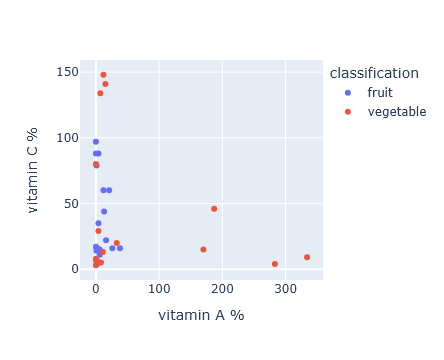

In [107]:
import plotly.express as px
px.scatter(df, x= "vitamin A %", y="vitamin C %", color = "classification")

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(df_train_x, df_train_y)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the cu

In [110]:
df_pred_y = clf.predict(df_test_x)
df_pred_y


array(['vegetable', 'vegetable', 'vegetable', 'vegetable', 'vegetable',
       'vegetable', 'fruit', 'vegetable', 'vegetable', 'fruit', 'fruit'],
      dtype=object)

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(df_test_y, clf.predict(df_text_x))


0.6363636363636364

In [112]:
accuracy_score(df_train_y, clf.predict(df_train_x))

1.0

In [121]:
df_high_calorie = df[df['calories (per 100g)'] > 50]
df_low_calorie = df[df['calories (per 100g)'] <= 50]

df_high_calorie

,vitamin A %,vitamin C %,calcium %,iron %,magnesium %,calories (per 100g),potassium (mg),protein (g),fiber (g),classification
0,1.0,7.0,0.0,0.0,1.0,52.0,107.0,0.3,2.4,fruit
2,2.0,16.0,1.0,3.0,7.0,160.0,485.0,2.0,7.0,fruit
3,1.0,14.0,0.0,1.0,6.0,89.0,358.0,1.1,2.6,fruit
6,1.0,16.0,0.0,1.0,1.0,57.0,77.0,0.7,2.4,fruit
15,12.0,60.0,3.0,8.0,1.0,73.0,280.0,0.7,7.0,fruit
16,2.0,6.0,1.0,1.0,1.0,67.0,191.0,0.6,0.9,fruit
17,33.0,20.0,5.0,11.0,7.0,61.0,180.0,1.5,1.8,vegetable
19,21.0,60.0,1.0,1.0,2.0,60.0,168.0,0.8,1.6,fruit
23,0.0,7.0,0.0,1.0,1.0,57.0,116.0,0.4,3.1,fruit
26,0.0,17.0,1.0,1.0,3.0,83.0,236.0,1.7,4.0,fruit


In [125]:
df_high_calorie_y = df_high_calorie['classification']
df_high_calorie_x = df_high_calorie.iloc[:, :-1]
accuracy_score(df_high_calorie_y, clf.predict(df_high_calorie_x))

1.0

In [126]:
df_low_calorie_y = df_low_calorie['classification']
df_low_calorie_x = df_low_calorie.iloc[:, :-1]
accuracy_score(df_low_calorie_y, clf.predict(df_low_calorie_x))

0.8260869565217391

In [127]:
df_new = pd.read_csv('data/fruits_test.csv')
df_new

,vitamin A %,vitamin C %,calcium %,iron %,magnesium %,calories (per 100g),potassium (mg),protein (g),fiber (g)
0,1.0,154.0,3.0,1.0,4.0,61.0,213.0,1.1,3.0
1,15.0,300.0,2.0,11.0,3.0,20.0,202.0,2.2,2.1
2,0.0,43.0,2.0,3.0,5.0,53.0,151.0,1.1,7.0


In [128]:
clf.predict(df_new)

array(['fruit', 'vegetable', 'fruit'], dtype=object)

## Наивен Бејесов алгоритам

Баејсовата теорема е правило за пресметување на условна веројатност што овозможува ажурирање на веројатноста на хипотеза врз основа на нови докази.

$$
P(A \mid B) = \frac{P(B \mid A)\, P(A)}{P(B)}
$$


$$
P(A_i \mid B) =
\frac{P(B \mid A_i)\, P(A_i)}
{\sum_{j=1}^{n} P(B \mid A_j)\, P(A_j)}
$$
$$
P(H \mid D) = \frac{P(D \mid H)\, P(H)}{P(D)}
$$


🔹 Prior (априорна веројатност)
𝑃
(
𝐻
)
P(H)

➡️ Веројатноста дека хипотезата 
𝐻
H е точна пред да ги видиме податоците.

Пример:
Веројатност дека некој е болен пред да се направи тест.

🔹 Likelihood (веројатност на доказот)
𝑃
(
𝐷
∣
𝐻
)
P(D∣H)

➡️ Веројатноста да ги добиеме податоците 
𝐷
D, ако хипотезата 
𝐻
H е точна.

Пример:
Колку е веројатно тестот да биде позитивен ако пациентот е болен.

🔹 Posterior (апостериорна веројатност)
𝑃
(
𝐻
∣
𝐷
)
P(H∣D)

➡️ Веројатноста дека хипотезата 
𝐻
H е точна по набљудување на податоците.

Ова е резултатот што сакаме да го добиеме.

🔹 Evidence / Marginal likelihood
𝑃
(
𝐷
)
P(D)

➡️ Вкупната веројатност да се појават податоците 
𝐷
D, без разлика која хипотеза е точна.

Наивниот Баејсов алгоритам е едноставен и ефикасен класификатор кој користи Баејсова теорема со претпоставка за независност на атрибутите.

table = [
#    f1  f2  f3  f4   y
    [ 0,  1,  1,  0,  1],
    [ 0,  0,  1,  1,  1],
    [ 1,  0,  1,  0,  1],
    [ 0,  0,  1,  1,  1],
    [ 0,  0,  0,  1,  1],
    [ 1,  0,  0,  1,  0],
    [ 1,  1,  0,  1,  0],
    [ 1,  0,  0,  0,  0],
    [ 1,  1,  0,  1,  0],
    [ 1,  0,  1,  1,  0]
]
table

In [145]:
def R(feature_x_index, value, output_class):
    # Gi sobirame redicite kade vrednsota na redicata e ednakva so output class
    a = sum([output_class == row[-1] for row in table])
    print(a)
    b = sum([output_class == row[-1] and row[feature_x_index-1] == value for row in table])
    return b / a

R(2, 0, 1)

    

5


0.8

Пример за 0011


S(0) = R1(0, 0)R2(0, 0)R3(1, 0)R4(1,0)

In [147]:
s_0 = R(1, 0, 0) * R(2, 0, 0) * R(3, 1, 0) * R(4, 1, 0)
s_0

5
5
5
5


0.0

In [149]:
s_1 = R(1, 0, 1) * R(2, 0, 1) * R(3, 1, 1) * R(4, 1, 1)
s_1

5
5
5
5


0.3072000000000001

Зошто ова е „наивно“?

Бидејќи во реалниот свет:

карактеристиките НЕ се независни

често се силно поврзани

Пример:

„Содржи збор free“

„Содржи збор win“

Во емаил:
➡️ тие НЕ се независни
➡️ но Naive Bayes ги третира како да се

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [177]:
data = open('data/vesti.txt', encoding='utf-8').read().lower().split('\n')
titles = [d.lstrip('naslov:').strip() for d in data if d.startswith('naslov')]
text_bodies = [d.lstrip('tekts').strip() for d in data if d.startswith('tekts')]
classes = [d.lstrip('klasa:').strip() for d in data if d.startswith('klasa')]
        

In [178]:
texts = []
for title, text_body in zip(titles, text_bodies):
    texts.append(''.join(bukva for bukva in title + text_body if bukva in 'абвгдѓежзѕијклљмнњопрстќуфхцчџш '))



In [179]:
train_dataset, test_dataset, train_labels, test_labels = train_test_split(texts, classes, test_size = 0.25, random_state = 60)


ValueError: Found input variables with inconsistent numbers of samples: [0, 3196]

In [180]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB(alpha = 1e-3)),
])

In [181]:
clf.fit(train_dataset, train_labels)

NameError: name 'train_dataset' is not defined

In [182]:
y_pred = clf.predict(test_dataset)
y_pred_train = clf.predict(train_dataset)

print("Accuracy Score on train data: ', 

NameError: name 'test_dataset' is not defined

In [225]:
import numpy as np
from plotly import graph_objects as go

In [226]:
weights = 2 * np.random.random((3, 1)) - 1

In [227]:
class NeuralNetwork:
    def __init__(self):
        self.weights = 2* np.random.random((3, 1)) - 1


    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def sigmoid_derivative(x):
        return x * (1 - x)

    def train(self, training_set_inputs, training_set_outputs, alpha, number_of_training_iterations):
        outputs = self.predict(training_set_inputs)

        error = training_set_outputs - outputs

        adjustment = np.dot(training_set_inputs.T, error * self.sigmoid_derivative(outputs))
    
    def predict(self, inputs):
        return self.sigmoid(np.dot(inputs, self.weights))

[-10.    -9.99  -9.98 ...   9.97   9.98   9.99]


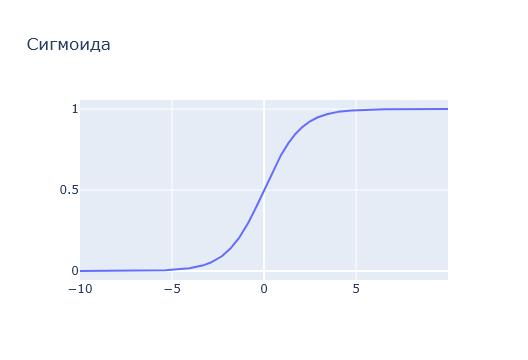

In [228]:
x = np.arange(-10, 10, 0.01)
print(x)
y = NeuralNetwork.sigmoid(x)

fig = go.Figure(layout_title = 'Сигмоида')
fig.add_scatter(x=x, y=y)


In [229]:
neural_network = NeuralNetwork()
neural_network.weights

array([[-0.93094103],
       [-0.65860739],
       [ 0.65015908]])

In [237]:
training_set_inputs = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
])
training_set_outputs = np.array([[0, 1, 1, 0]]).

SyntaxError: invalid syntax (2324154418.py, line 7)

In [233]:
neural_network.train(training_set_inputs, training_set_outputs, alpha = 5, number_of_training_iterations = 10000)

In [234]:
neural_network.weights

array([[-0.93094103],
       [-0.65860739],
       [ 0.65015908]])

In [235]:
new_input = np.array([1, 0, 0])
neural_network.predict(new_input)

array([0.28273384])

In [238]:
import numpy as np

class NeuralNetwork:
    def __init__(self):
        self.weights = 2 * np.random.random((3, 1)) - 1

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def sigmoid_derivative(x):
        return x * (1 - x)

    def train(self, training_set_inputs, training_set_outputs, alpha, number_of_training_iterations):
        for _ in range(number_of_training_iterations):
            output = self.predict(training_set_inputs)
            error = training_set_outputs - output
            adjustment = np.dot(training_set_inputs.T, error * self.sigmoid_derivative(output))
            self.weights += alpha * adjustment

    def predict(self, inputs):
        return self.sigmoid(np.dot(inputs, self.weights))

# Init
neural_network = NeuralNetwork()
print("Initial weights:\n", neural_network.weights)

training_set_inputs = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
])

# FIX: outputs must be (4,1), no trailing dot
training_set_outputs = np.array([
    [0],
    [1],
    [1],
    [0],
])

neural_network.train(training_set_inputs, training_set_outputs, alpha=0.01, number_of_training_iterations=10000)
print("Trained weights:\n", neural_network.weights)

new_input = np.array([[1, 0, 0]])  # FIX: make it (1,3)
print("Prediction:\n", neural_network.predict(new_input))


Initial weights:
 [[-0.12703461]
 [-0.83729463]
 [-0.22013493]]
Trained weights:
 [[ 4.58399865]
 [-0.3008979 ]
 [-2.01568597]]
Prediction:
 [[0.9898893]]
